## About data:
 retrieved from : https://www.kaggle.com/datasets/uciml/mushroom-classification

Although this dataset was originally contributed to the UCI Machine Learning repository nearly 30 years ago, mushroom hunting (otherwise known as "shrooming") is enjoying new peaks in popularity. Learn which features spell certain death and which are most palatable in this dataset of mushroom characteristics. And how certain can your model be?

Family Mushroom drawn from The Audubon Society Field Guide to North American Mushrooms (1981). Each species is identified as definitely edible, definitely poisonous, or of unknown edibility and not recommended. This latter class was combined with the poisonous one. The Guide clearly states that there is no simple rule for determining the edibility of a mushroom; no rule like "leaflets three, let it be'' for Poisonous Oak and Ivy.

 Attribute Information: (classes: edible=e, poisonous=p)

* cap-shape: bell=b,conical=c,convex=x,flat=f, knobbed=k,sunken=s

* cap-surface: fibrous=f,grooves=g,scaly=y,smooth=s

* cap-color: brown=n,buff=b,cinnamon=c,gray=g,green=r,pink=p,purple=u,red=e,white=w,yellow=y

* bruises: bruises=t,no=f

* odor: almond=a,anise=l,creosote=c,fishy=y,foul=f,musty=m,none=n,pungent=p,spicy=s

* gill-attachment: attached=a,descending=d,free=f,notched=n

* gill-spacing: close=c,crowded=w,distant=d

* gill-size: broad=b,narrow=n

* gill-color: black=k,brown=n,buff=b,chocolate=h,gray=g, green=r,orange=o,pink=p,purple=u,red=e,white=w,yellow=y

* stalk-shape: enlarging=e,tapering=t

* stalk-root: bulbous=b,club=c,cup=u,equal=e,rhizomorphs=z,rooted=r,missing=?

* stalk-surface-above-ring: fibrous=f,scaly=y,silky=k,smooth=s

* stalk-surface-below-ring: fibrous=f,scaly=y,silky=k,smooth=s

* stalk-color-above-ring: brown=n,buff=b,cinnamon=c,gray=g,orange=o,pink=p,red=e,white=w,yellow=y

* stalk-color-below-ring: brown=n,buff=b,cinnamon=c,gray=g,orange=o,pink=p,red=e,white=w,yellow=y

* veil-type: partial=p,universal=u

* veil-color: brown=n,orange=o,white=w,yellow=y

* ring-number: none=n,one=o,two=t

* ring-type: cobwebby=c,evanescent=e,flaring=f,large=l,none=n,pendant=p,sheathing=s,zone=z

* spore-print-color: black=k,brown=n,buff=b,chocolate=h,green=r,orange=o,purple=u,white=w,yellow=y

* population: abundant=a,clustered=c,numerous=n,scattered=s,several=v,solitary=y

* habitat: grasses=g,leaves=l,meadows=m,paths=p,urban=u,waste=w,woods=d



In [2]:
import pandas as pd
import numpy as np

# visualization
import seaborn as sns
import matplotlib.pyplot as plt

from matplotlib.backends.backend_pdf import PdfPages

import plotly.graph_objects as go
import plotly.express as px
import io

# Model tuning
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.cluster import KMeans

# data preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, OrdinalEncoder
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.compose import ColumnTransformer
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error


from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.preprocessing import OrdinalEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# other
import sys
import warnings
from time import sleep

if not sys.warnoptions:
    warnings.simplefilter("ignore")


# EDA, Data Visualizations


In [3]:
# ## reading csv from colab
# from google.colab import files    
# uploaded = files.upload()

ModuleNotFoundError: No module named 'google'

In [4]:
df = pd.read_csv('mushrooms.csv')

df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [5]:
# df = pd.read_csv(io.BytesIO(uploaded['mushrooms.csv']))

NameError: name 'uploaded' is not defined

In [30]:
df.head(3)

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m


In [31]:
df.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


**class** -dominant value is edible

---


**cap-shape** -dominant value is convex

---
**cap-color** -dominant value is brown


---

**odor** -dominant value is none


In [32]:
print(df.info()) 
print("\n")
print("# of NaNs: " + str(df.isna().sum().sum()))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [33]:
print(df.nunique())

class                        2
cap-shape                    6
cap-surface                  4
cap-color                   10
bruises                      2
odor                         9
gill-attachment              2
gill-spacing                 2
gill-size                    2
gill-color                  12
stalk-shape                  2
stalk-root                   5
stalk-surface-above-ring     4
stalk-surface-below-ring     4
stalk-color-above-ring       9
stalk-color-below-ring       9
veil-type                    1
veil-color                   4
ring-number                  3
ring-type                    5
spore-print-color            9
population                   6
habitat                      7
dtype: int64


No missing values and all the columns are of object type( 22 indep. vars and 1 dependent var- ***class***)

since the number of unique values for all cols is less than or eq to 12, can encode them to fit to the models. <br>
From the description, all cols are non-ordinal categoric variables



---



In [6]:

y = df[['class']]
X = df.drop(df.columns[0],axis = 1)



In [10]:
print(df.groupby("class")["odor"].count())
print(df.groupby("class")["odor"].value_counts())

class
e    4208
p    3916
Name: odor, dtype: int64
class  odor
e      n       3408
       a        400
       l        400
p      f       2160
       s        576
       y        576
       p        256
       c        192
       n        120
       m         36
Name: count, dtype: int64


In [26]:
X_od=df["odor"]
X_od = pd.get_dummies(X_od,drop_first=True)

print(X_od.shape)
print(type(X_od))
print(type(y))

classes = {'p': 1, 'e': 0}
df["class"]=df["class"].map(classes)
y= df["class"]
print(y.shape)
X_tr,y_tr,X_tst,y_tst = train_test_split(X_od,y, test_size=0.25, random_state=42)

print(X_tr.shape)
print(y_tr.shape)

(8124, 8)
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>
(8124,)
(6093, 8)
(2031, 8)


In [24]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier()
rfc.fit(y_tr,X_tr)
pred= rfc.predict(X_tst)
print(accuracy_score(y_tst,pred))
print(precision_score(y_tst,pred))

ValueError: Found input variables with inconsistent numbers of samples: [2031, 6093]

# PLOTS


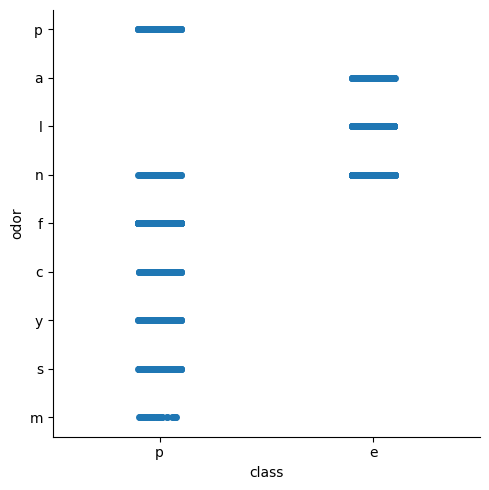

In [ ]:
sns.catplot(data=df, x="class", y="odor")
plt.show()  # poisoonous ones do not appear with a and l odors , while edible ones have only l,a,n smells

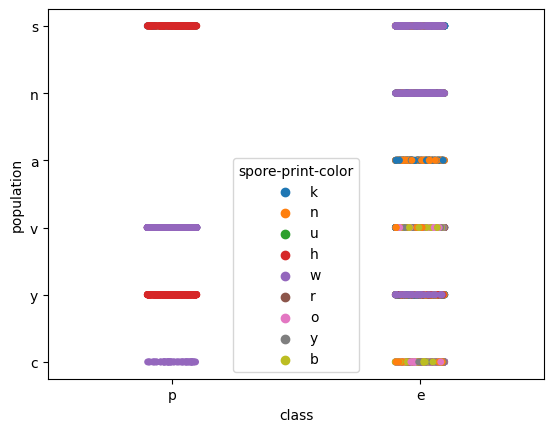

In [ ]:
sns.stripplot(data=df, x="class",y="population", hue="spore-print-color")
plt.show()
#edible ones have more diverse population while poisions ones either appear alone or with several ones together or solitary or clustered.

/usr/local/lib/python3.9/dist-packages/seaborn/categorical.py:3544: UserWarning: 92.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.9/dist-packages/seaborn/categorical.py:3544: UserWarning: 97.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.9/dist-packages/seaborn/categorical.py:3544: UserWarning: 90.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.9/dist-packages/seaborn/categorical.py:3544: UserWarning: 97.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.9/dist-packages/seaborn/categorical.py:3544: UserWarning: 95.3% of the points cannot be placed; y

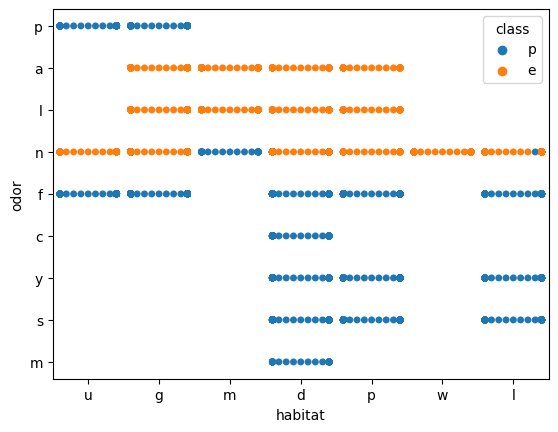

In [35]:
sns.swarmplot(data=df,x="habitat",y="odor", hue="class")
plt.show()   ###only very few posionous mushrooms live in woods and meadows, and no  poisionous mushroom smells liek almonds or anise(a ,l) and only few have no smell, so the majority of poisonous ones do have an odor

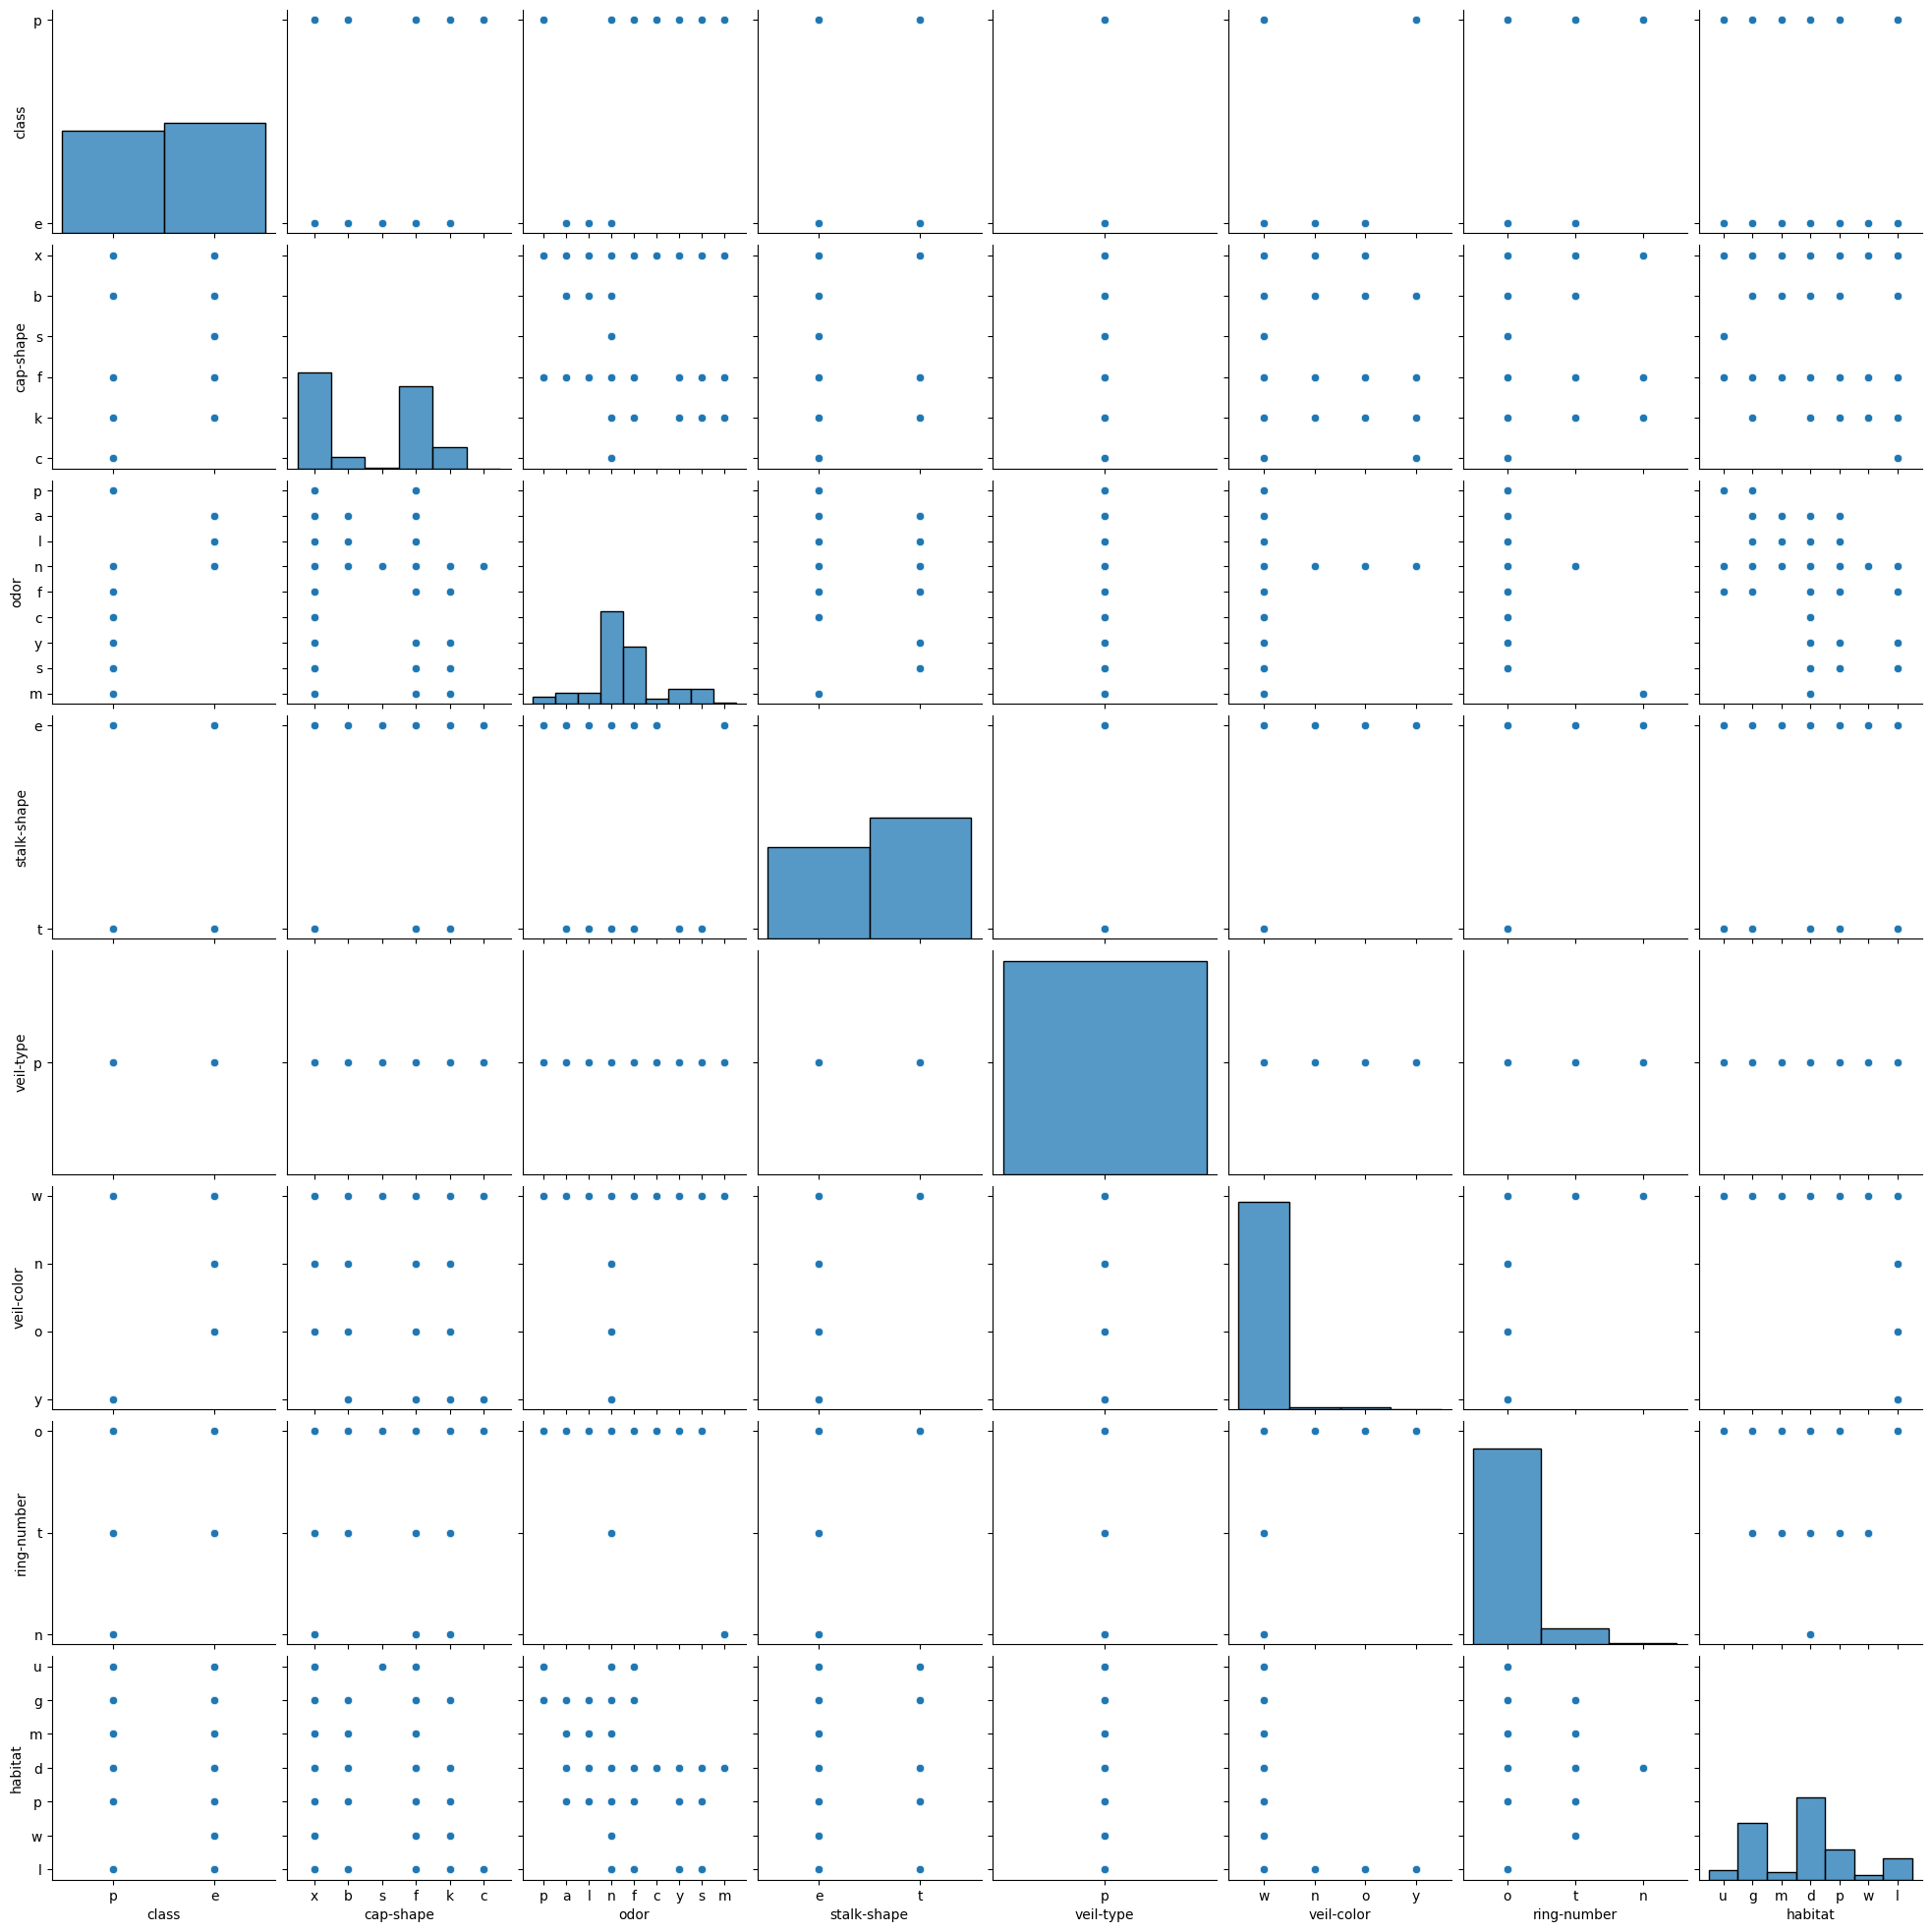

In [ ]:
# sns.set()
cols = ['class', 'cap-shape', 'odor', 'stalk-shape','veil-type', 'veil-color', 'ring-number','habitat' ]
sns.pairplot(data=df, vars=cols)
plt.show()

there are more d=wood habitats, more o=single ring_number, vel-color=white, all veil-types are partial, stalk-shapes and classes are nearly balanced, etc... <br>
poisionous mushrooms don't have orange and brown veilcolors, they have different odors than edible ones, are sometimes conical unlike edible mushrooms, poisonous mushrooms do not appear in waste habitats while edible ones live everywhere.
tapering stalk-shapes are only of white color.... 

In [37]:
classes = {'p': 1, 'e': 0}
df["class"]=df["class"].map(classes)



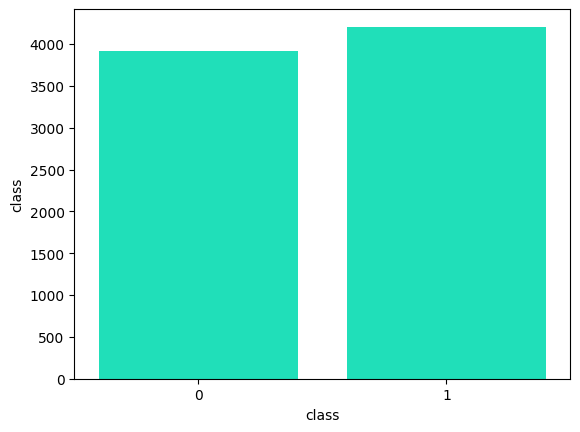

In [ ]:
sns.barplot(data=df, x="class",y=df.groupby(["class"])["class"].count(), color=[0,1,.8])
plt.show()  # balanced data, no need for up/downsampling

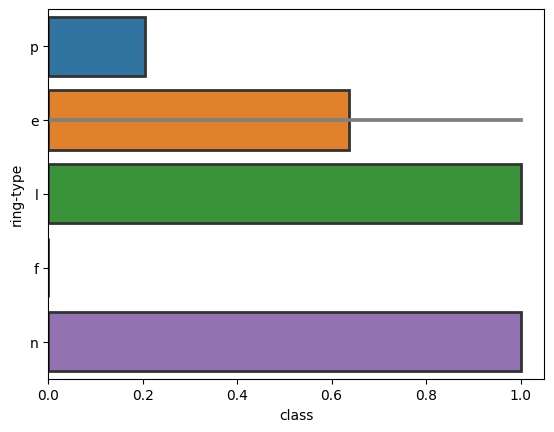

In [ ]:
# import math
sns.barplot(data=df, x="class",y="ring-type",errorbar=("pi",50),errcolor=".5",linewidth=2,edgecolor="0.2")
plt.show()
# # mushrooms 

In [ ]:
grouped_data = df.groupby(["class", "ring-type"])['ring-type'].count().reset_index(name = "Count",inplace=False)
print(grouped_data)

   class ring-type  Count
0      0         e   1008
1      0         f     48
2      0         p   3152
3      1         e   1768
4      1         l   1296
5      1         n     36
6      1         p    816


<Axes: xlabel='class', ylabel='Count'>

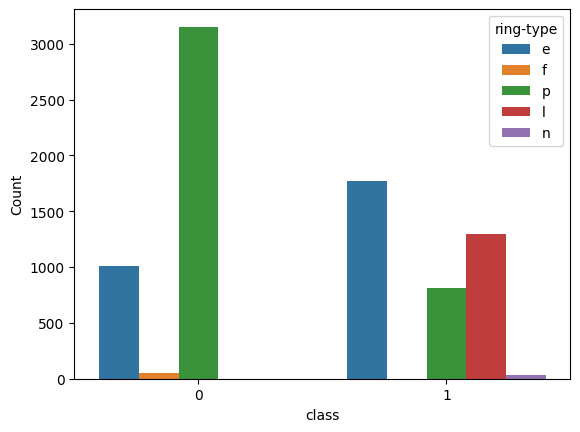

In [ ]:
sns.barplot(data = grouped_data, x = "class", y ="Count", hue = "ring-type")  #the majority of edibles has pendant ring types, while for poisouns evanescent is dominating

In [38]:
X = pd.get_dummies(X,drop_first=True)

Find most important features relative to target


<ipython-input-39-bff8bb24b6a4>:4: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  upper = cor.where(np.triu(np.ones(cor.shape),k=1).astype(np.bool))


['stalk-color-above-ring_c', 'stalk-color-above-ring_o', 'stalk-color-below-ring_c', 'stalk-color-below-ring_o', 'veil-color_w', 'veil-color_y', 'ring-number_t', 'ring-type_n']
[]


<ipython-input-39-bff8bb24b6a4>:14: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  upper = cor.where(np.triu(np.ones(cor.shape),k=1).astype(np.bool))


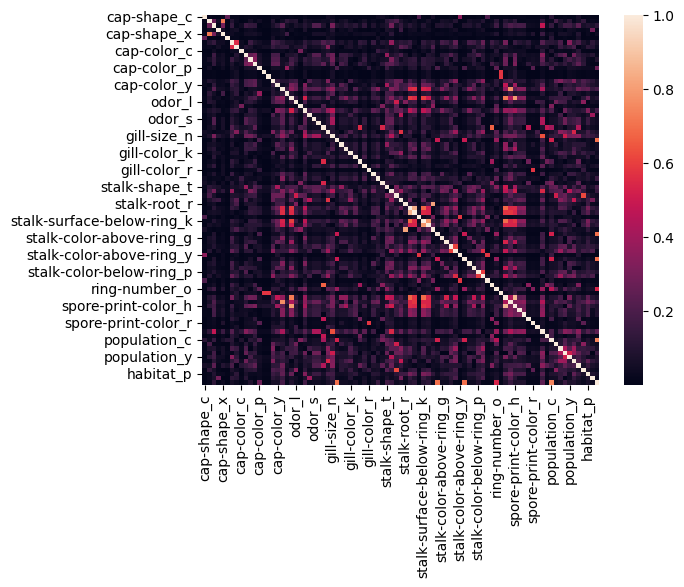

In [39]:
print("Find most important features relative to target")
cor = X.corr().abs()
# get upper triangle of correlation matrix
upper = cor.where(np.triu(np.ones(cor.shape),k=1).astype(np.bool))
# find features with correlation greater than 0.9
to_drop = [column for column in upper.columns if any(upper[column] > 0.9)]
print(to_drop)
# # drop highly correlated features
X.drop(to_drop, axis=1, inplace=True)



cor = X.corr().abs()
upper = cor.where(np.triu(np.ones(cor.shape),k=1).astype(np.bool))
to_drop = [column for column in upper.columns if any(upper[column] > 0.9)]
print(to_drop)
X.drop(to_drop, axis=1, inplace=True)


cor = X.corr().abs()
sns.heatmap(cor)
plt.show()
#this you can see at the time of heatmap also.



# ---



> ***MODELS***

> LOGISTIC RERESSION







---



In [40]:
y = df['class'] #.map({'p': 1, 'e': 0})

# for col_name, col in X.items():
#     if (col.dtype == object): X[col_name] = col.astype('category').cat.as_ordered()

# X = pd.get_dummies(X,drop_first=True)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

scaler = StandardScaler().fit(X_train)
train_sc = scaler.transform(X_train)

test_sc = scaler.transform(X_test)


In [14]:
print(train_sc.shape)
print(test_sc.shape)
print(df.shape)

(5686, 87)
(2438, 87)
(8124, 23)


In [41]:
lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [44]:
#without using StandardScaler

y_pred = lr_model.predict(X_test)  

# Calculate evaluation metrics
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print evaluation metrics
print(f"Accuracy: {acc:.4f}")
print(f"Precision: {prec:.4f}")
print(f"Recall: {rec:.4f}")
print(f"F1 score: {f1:.4f}")


Accuracy: 0.9992
Precision: 1.0000
Recall: 0.9983
F1 score: 0.9992


In [45]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred) 
print ("\nConfusion Matrix : \n", cm)  #only 2 false positives and no false negatives


Confusion Matrix : 
 [[1257    0]
 [   2 1179]]


In [46]:
# using standard scaler

lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(train_sc, y_train)

y_pred2 = lr_model.predict(test_sc)  

# Calculate evaluation metrics
acc = accuracy_score(y_test, y_pred2)
prec = precision_score(y_test, y_pred2)
rec = recall_score(y_test, y_pred2)
f1 = f1_score(y_test, y_pred2)

# Print evaluation metrics
print(f"Accuracy: {acc:.4f}")
print(f"Precision: {prec:.4f}")
print(f"Recall: {rec:.4f}")
print(f"F1 score: {f1:.4f}")


# all score measures are 1s ??


Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000
F1 score: 1.0000




---



>  ***KNN***

---









In [47]:
from sklearn.ensemble import RandomForestClassifier

In [48]:
rf = RandomForestClassifier()
rf.fit(train_sc, y_train)

RandomForestClassifier()

In [49]:
y_pred3 = rf.predict(test_sc)

In [50]:
accuracy = accuracy_score(y_test, y_pred3)
print("Accuracy:", accuracy)  #1

Accuracy: 1.0


In [53]:
target = df['class']
X = df.drop(columns=['class'])

X = pd.get_dummies(X)

0       1
1       0
2       0
3       1
4       0
       ..
8119    0
8120    0
8121    0
8122    1
8123    0
Name: class, Length: 8124, dtype: int64
  cap-shape cap-surface cap-color bruises odor gill-attachment gill-spacing  \
0         x           s         n       t    p               f            c   
1         x           s         y       t    a               f            c   

  gill-size gill-color stalk-shape  ... stalk-surface-below-ring  \
0         n          k           e  ...                        s   
1         b          k           e  ...                        s   

  stalk-color-above-ring stalk-color-below-ring veil-type veil-color  \
0                      w                      w         p          w   
1                      w                      w         p          w   

  ring-number ring-type spore-print-color population habitat  
0           o         p                 k          s       u  
1           o         p                 n          n       g  



In [54]:
wcss = []

for cluster in range(1,11):
    kmeans = KMeans(n_clusters = cluster, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: F

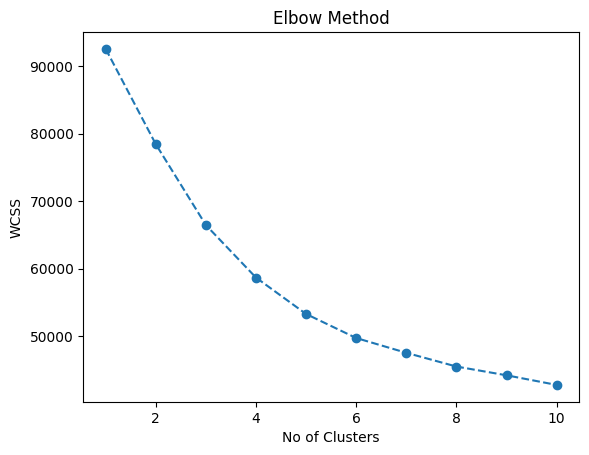

In [55]:
plt.plot(range(1,11), wcss, 'o--')
plt.title('Elbow Method')
plt.xlabel('No of Clusters')
plt.ylabel('WCSS')

plt.show()

# let's choose k=5

In [56]:
kmeans = KMeans(n_clusters = 4, init = 'k-means++', random_state = 42)
y = kmeans.fit_predict(X)
y

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([0, 0, 0, ..., 0, 2, 0], dtype=int32)

In [57]:
X['Cluster'] = kmeans.labels_
X.head()

,cap-shape_b,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_f,cap-surface_g,cap-surface_s,cap-surface_y,...,population_v,population_y,habitat_d,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w,Cluster
0,0,0,0,0,0,1,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
1,0,0,0,0,0,1,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
3,0,0,0,0,0,1,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
4,0,0,0,0,0,1,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0


In [58]:
X["Cluster"].value_counts()

0    3316
2    1760
3    1752
1    1296
Name: Cluster, dtype: int64

In [120]:
train_x, test_x, train_y, test_y = train_test_split(
    X, target, test_size=0.25, random_state=42)
print(
    f"Number of observations \n Train set: {len(train_x)}\n Test set: {len(test_x)}")

Number of observations 
 Train set: 6093
 Test set: 2031


In [121]:
sc= StandardScaler()
train_x = sc. fit(train_x).transform(train_x)
test_x = sc.transform(test_x)

In [122]:
rf2 = RandomForestClassifier()
rf2.fit(train_x, train_y)

RandomForestClassifier()

In [62]:
y_pred4 = rf2.predict(test_x)

In [63]:
accuracy = accuracy_score(test_y, y_pred4)
print("Accuracy:", accuracy)  # 1 acc score

Accuracy: 1.0


In [123]:
import statsmodels.api as sm

In [ ]:
X_test = sm.add_constant(X_test)
X_train = sm.add_constant(X_train)

log_reg = sm.Logit(y_train, X_train).fit()

In [74]:
print(log_reg.summary())

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                  class   No. Observations:                 5686
Model:                          Logit   Df Residuals:                     5600
Method:                           MLE   Df Model:                           85
Date:                Fri, 21 Apr 2023   Pseudo R-squ.:                   1.000
Time:                        18:45:08   Log-Likelihood:            -0.00015103
converged:                      False   LL-Null:                       -3937.1
Covariance Type:            nonrobust   LLR p-value:                     0.000
==============================================================================================
                                 coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                        -55.9268        nan        nan        nan         nan         nan
cap-shape_c                   -6.8741   1.68e+04     -0.000      1.000    -3.3e+04     3.3e+04
cap-shape_f                    1.0899    644.428      0.002      0.999   -1261.966    1264.146
cap-shape_k                    0.7015    673.916      0.001      0.999   -1320.149    1321.552
cap-shape_s                   11.0090   1.18e+04      0.001      0.999   -2.31e+04    2.31e+04
cap-shape_x                    0.9017    639.344      0.001      0.999   -1252.190    1253.993
cap-surface_g                  7.8532   2.93e+04      0.000      1.000   -5.74e+04    5.74e+04
cap-surface_s                  1.1811    637.952      0.002      0.999   -1249.181    1251.543
cap-surface_y                  0.2730    564.694      0.000      1.000   -1106.507    1107.053
cap-color_c                   -3.0138   6.83e+05  -4.41e-06      1.000   -1.34e+06    1.34e+06
cap-color_e                    6.7821   3014.490      0.002      0.998   -5901.509    5915.073
cap-color_g                    2.0688   2953.785      0.001      0.999   -5787.244    5791.381
cap-color_n                    5.2162   2989.874      0.002      0.999   -5854.829    5865.261
cap-color_p                    4.2564   4938.073      0.001      0.999   -9674.188    9682.701
cap-color_r                   -3.8658   4.08e+05  -9.47e-06      1.000      -8e+05       8e+05
cap-color_u                   -3.6592   3.68e+05  -9.96e-06      1.000    -7.2e+05     7.2e+05
cap-color_w                    8.0611   4058.365      0.002      0.998   -7946.188    7962.310
cap-color_y                    3.9022   3036.640      0.001      0.999   -5947.804    5955.608
bruises_t                     24.5702   2.97e+09   8.28e-09      1.000   -5.81e+09    5.81e+09
odor_c                        70.8529   2.97e+09   2.39e-08      1.000   -5.81e+09    5.81e+09
odor_f                        23.7086        nan        nan        nan         nan         nan
odor_l                        -8.5671   3.78e+04     -0.000      1.000   -7.42e+04    7.42e+04
odor_m                        58.2361   2.97e+09   1.96e-08      1.000   -5.81e+09    5.81e+09
odor_n                       -18.5583   2.97e+09  -6.26e-09      1.000   -5.81e+09    5.81e+09
odor_p                        11.9666   4.38e+08   2.73e-08      1.000   -8.58e+08    8.58e+08
odor_s                        12.0768        nan        nan        nan         nan         nan
odor_y                        27.0753        nan        nan        nan         nan         nan
gill-attachment_f             -0.9323   2.59e+04   -3.6e-05      1.000   -5.08e+04    5.08e+04
gill-spacing_w                 6.5008   4.41e+05   1.47e-05      1.000   -8.65e+05    8.65e+05
gill-size_n                    2.8919   2.97e+09   9.75e-10      1.000   -5.81e+09    5.81e+09
gill-color_e                  -9.2300        nan        nan        nan         nan         nan
gill-color_

In [117]:
df = pd.read_csv("mushrooms.csv")
classes = {'p': 1, 'e': 0}
df["class"]=df["class"].map(classes)

target = df['class']
X = df.drop(columns=['class'])
X = pd.get_dummies(X)

In [118]:
X_train, X_test, y_train, y_test = train_test_split(X,target ,random_state=42, test_size=0.25, shuffle=True)

In [ ]:
X_test = sm.add_constant(X_test)
X_train = sm.add_constant(X_train)

# sc = StandardScaler().fit(X_train)
# X_train = sc.transform(X_train)
# X_test = sc.transform(X_test)

log_reg = sm.Logit(y_train, X_train).fit()

In [ ]:
pred = model.predict(X_test)
pred = list(map(round,pred))
cm = confusion_matrix(y_test, pred) 
print ("Confusion Matrix : \n", cm) 

In [94]:
y_train.shape

(6093,)